In [7]:
import numpy as np
import pandas as pd
from pathlib import Path
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

import nltk
#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')
#nltk.download('vader_lexicon')
#nltk.download('averaged_perceptron_tagger')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/maryamakbar/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [8]:
path = Path.cwd() / "DisneylandReviews.csv"

disney_orig = pd.read_csv(path, encoding= 'latin-1', header = [0], skipinitialspace= True, index_col=0)

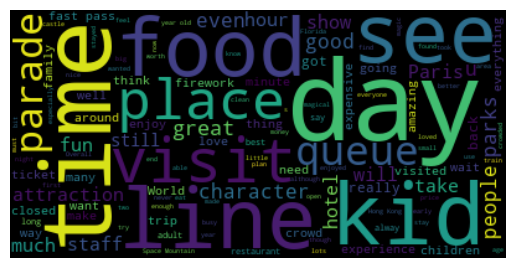

In [9]:
txt = ' '.join(disney_orig["Review_Text"].fillna(''))

filter_out = set(STOPWORDS)
filter_out.update(['park','ride','rides','went','lot','Disneyland','go','one','Disney'])

wordcloud = WordCloud(stopwords=filter_out).generate(txt)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [10]:
def preproc_txt(text):

    orig_tokens = word_tokenize(text.lower())

    filt_tokens = [token for token in orig_tokens if token not in stopwords.words("english")]

    lemm_tokens = [WordNetLemmatizer().lemmatize(token) for token in filt_tokens]

    proc_txt = ''.join(lemm_tokens)

    return proc_txt

disney_orig["Review_Text"].apply(preproc_txt)

def get_sent(text):
    scores = SentimentIntensityAnalyzer().polarity_scores(text)
    sent = 1 if scores['pos']>0 else 0
    return sent

disney_orig["Sentiment"]= disney_orig["Review_Text"].apply(get_sent)
print(disney_orig)

           Rating Year_Month     Reviewer_Location  \
Review_ID                                            
670772142       4     2019-4             Australia   
670682799       4     2019-5           Philippines   
670623270       4     2019-4  United Arab Emirates   
670607911       4     2019-4             Australia   
670607296       4     2019-4        United Kingdom   
...           ...        ...                   ...   
1765031         5    missing        United Kingdom   
1659553         5    missing                Canada   
1645894         5    missing          South Africa   
1618637         4    missing         United States   
1536786         4    missing        United Kingdom   

                                                 Review_Text  \
Review_ID                                                      
670772142  If you've ever been to Disneyland anywhere you...   
670682799  Its been a while since d last time we visit HK...   
670623270  Thanks God it wasn   t too hot

In [11]:
#Function to get the adjectives.
def get_adjectives(text): 
    blob = TextBlob(text)
    return [ word for (word,tag) in blob.tags if tag == "JJ"]

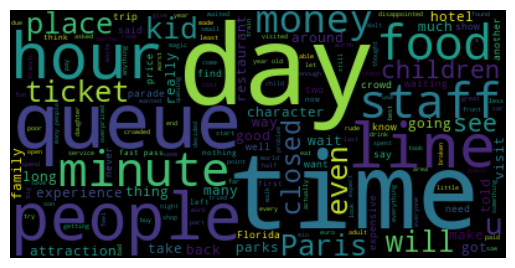

In [14]:
neg_rating = disney_orig[disney_orig['Rating']==1]
neg_rating
neg_rating_txt = ''.join(neg_rating['Review_Text'].fillna(' '))

#Create and generate a word cloud image:
negative_rating_wordcloud = WordCloud(stopwords= filter_out).generate(neg_rating_txt)

#Display the generated image
plt.imshow(negative_rating_wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

/Users/maryamakbar/Desktop/personal_project/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/maryamakbar/Desktop/personal_project/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/maryamakbar/Desktop/personal_project/.venv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


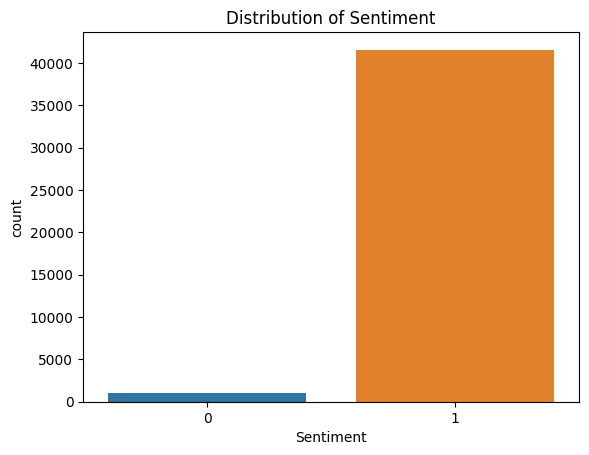

In [16]:
#Distribution of ranking
import seaborn as sns

sns.countplot(x='Sentiment', data=disney_orig)
plt.title('Distribution of Sentiment')
plt.show()

In [17]:
disney_orig["Polarity"]= disney_orig["Review_Text"].apply(SentimentIntensityAnalyzer().polarity_scores)

In [18]:
disney_orig

,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Sentiment,Polarity
Review_ID,,,,,,,
670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,1,"{'neg': 0.0, 'neu': 0.887, 'pos': 0.113, 'comp..."
670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,1,"{'neg': 0.04, 'neu': 0.73, 'pos': 0.231, 'comp..."
670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,1,"{'neg': 0.024, 'neu': 0.742, 'pos': 0.235, 'co..."
670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,1,"{'neg': 0.08, 'neu': 0.76, 'pos': 0.16, 'compo..."
670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,1,"{'neg': 0.0, 'neu': 0.899, 'pos': 0.101, 'comp..."
...,...,...,...,...,...,...,...
1765031,5,missing,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris,1,"{'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'comp..."
1659553,5,missing,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris,1,"{'neg': 0.02, 'neu': 0.776, 'pos': 0.204, 'com..."
1645894,5,missing,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris,1,"{'neg': 0.021, 'neu': 0.881, 'pos': 0.098, 'co..."


In [45]:
def get_neutrality(text):
    scores = SentimentIntensityAnalyzer().polarity_scores(text)
    neu_sent = scores['neu']
    return neu_sent

In [46]:
def get_polarity(text):
    scores = SentimentIntensityAnalyzer().polarity_scores(text)
    pos_sent = scores['pos']
    return pos_sent

In [32]:
disney_orig["Positive_Polarity"]= disney_orig["Review_Text"].apply(get_polarity)

In [33]:
disney_orig

,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Sentiment,Polarity,Positive_Polarity
Review_ID,,,,,,,,
670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,1,"{'neg': 0.0, 'neu': 0.887, 'pos': 0.113, 'comp...",0.113
670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,1,"{'neg': 0.04, 'neu': 0.73, 'pos': 0.231, 'comp...",0.231
670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,1,"{'neg': 0.024, 'neu': 0.742, 'pos': 0.235, 'co...",0.235
670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,1,"{'neg': 0.08, 'neu': 0.76, 'pos': 0.16, 'compo...",0.160
670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,1,"{'neg': 0.0, 'neu': 0.899, 'pos': 0.101, 'comp...",0.101
...,...,...,...,...,...,...,...,...
1765031,5,missing,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris,1,"{'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'comp...",0.167
1659553,5,missing,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris,1,"{'neg': 0.02, 'neu': 0.776, 'pos': 0.204, 'com...",0.204
1645894,5,missing,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris,1,"{'neg': 0.021, 'neu': 0.881, 'pos': 0.098, 'co...",0.098


In [36]:
disney_orig["Positive_Polarity"].quantile([.25,.5,.75])

0.25    0.108
0.50    0.162
0.75    0.231
Name: Positive_Polarity, dtype: float64

In [37]:
disney_orig["Positive_Polarity"].max()

0.863

<BarContainer object of 42656 artists>

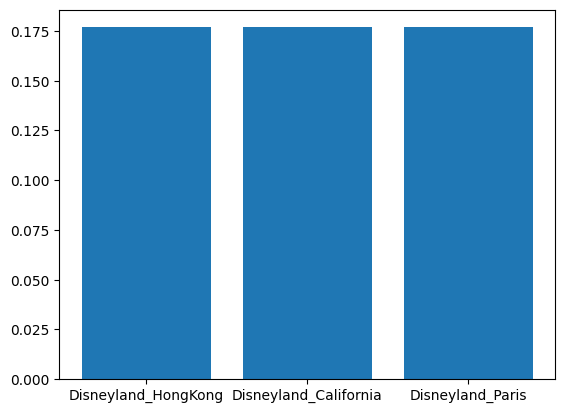

In [41]:
plt.bar(disney_orig["Branch"],disney_orig["Positive_Polarity"].mean())

In [42]:
plt.show()

In [47]:
disney_orig["Neutral_Polarity"]= disney_orig["Review_Text"].apply(get_neutrality)
disney_orig

,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Sentiment,Polarity,Positive_Polarity,Neutral_Polarity
Review_ID,,,,,,,,,
670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,1,"{'neg': 0.0, 'neu': 0.887, 'pos': 0.113, 'comp...",0.113,0.887
670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,1,"{'neg': 0.04, 'neu': 0.73, 'pos': 0.231, 'comp...",0.231,0.730
670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,1,"{'neg': 0.024, 'neu': 0.742, 'pos': 0.235, 'co...",0.235,0.742
670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,1,"{'neg': 0.08, 'neu': 0.76, 'pos': 0.16, 'compo...",0.160,0.760
670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,1,"{'neg': 0.0, 'neu': 0.899, 'pos': 0.101, 'comp...",0.101,0.899
...,...,...,...,...,...,...,...,...,...
1765031,5,missing,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris,1,"{'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'comp...",0.167,0.833
1659553,5,missing,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris,1,"{'neg': 0.02, 'neu': 0.776, 'pos': 0.204, 'com...",0.204,0.776
1645894,5,missing,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris,1,"{'neg': 0.021, 'neu': 0.881, 'pos': 0.098, 'co...",0.098,0.881


In [49]:
def get_comp_polarity(text):
    scores = SentimentIntensityAnalyzer().polarity_scores(text)
    comp_sent = scores['compound']
    return comp_sent

In [50]:
disney_orig["Compound_Polarity"]= disney_orig["Review_Text"].apply(get_comp_polarity)

In [51]:
disney_orig

,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Sentiment,Polarity,Positive_Polarity,Neutral_Polarity,Compound_Polarity
Review_ID,,,,,,,,,,
670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong,1,"{'neg': 0.0, 'neu': 0.887, 'pos': 0.113, 'comp...",0.113,0.887,0.7069
670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,1,"{'neg': 0.04, 'neu': 0.73, 'pos': 0.231, 'comp...",0.231,0.730,0.9901
670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,1,"{'neg': 0.024, 'neu': 0.742, 'pos': 0.235, 'co...",0.235,0.742,0.9920
670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong,1,"{'neg': 0.08, 'neu': 0.76, 'pos': 0.16, 'compo...",0.160,0.760,0.8489
670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong,1,"{'neg': 0.0, 'neu': 0.899, 'pos': 0.101, 'comp...",0.101,0.899,0.2846
...,...,...,...,...,...,...,...,...,...,...
1765031,5,missing,United Kingdom,i went to disneyland paris in july 03 and thou...,Disneyland_Paris,1,"{'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'comp...",0.167,0.833,0.9860
1659553,5,missing,Canada,2 adults and 1 child of 11 visited Disneyland ...,Disneyland_Paris,1,"{'neg': 0.02, 'neu': 0.776, 'pos': 0.204, 'com...",0.204,0.776,0.9909
1645894,5,missing,South Africa,My eleven year old daughter and myself went to...,Disneyland_Paris,1,"{'neg': 0.021, 'neu': 0.881, 'pos': 0.098, 'co...",0.098,0.881,0.8402


<BarContainer object of 42656 artists>

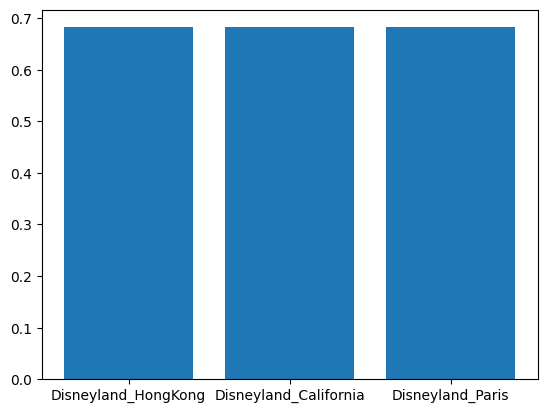

In [54]:
plt.bar(disney_orig["Branch"],disney_orig["Compound_Polarity"].mean())

In [61]:
quantile_table = disney_orig["Compound_Polarity"].quantile([0.25,0.5,0.75])
quantile_table

0.25    0.6588
0.50    0.8977
0.75    0.9659
Name: Compound_Polarity, dtype: float64

In [57]:
disney_orig["Compound_Polarity"].max()

0.9999

In [65]:
disney_hk = disney_orig[disney_orig["Branch"]=="Disneyland_HongKong"]
disney_paris = disney_orig[disney_orig["Branch"]=="Disneyland_Paris"]
disney_ca = disney_orig[disney_orig["Branch"]=="Disneyland_California"]

In [67]:
disney_hk["Compound_Polarity"].quantile([0.25,0.5,0.75])

0.25    0.665425
0.50    0.892800
0.75    0.961800
Name: Compound_Polarity, dtype: float64

In [68]:
disney_paris["Compound_Polarity"].quantile([0.25,0.5,0.75])

0.25    0.6204
0.50    0.9062
0.75    0.9721
Name: Compound_Polarity, dtype: float64

In [69]:
disney_ca["Compound_Polarity"].quantile([0.25,0.5,0.75])

0.25    0.67050
0.50    0.89345
0.75    0.96310
Name: Compound_Polarity, dtype: float64

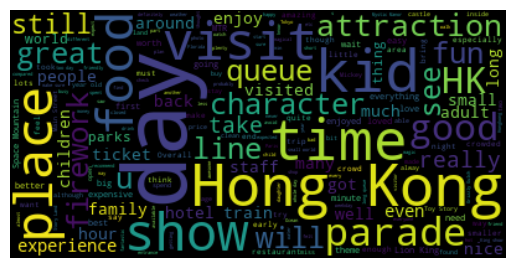

In [70]:
txt = ' '.join(disney_hk["Review_Text"].fillna(''))

filter_out = set(STOPWORDS)
filter_out.update(['park','ride','rides','went','lot','Disneyland','go','one','Disney'])

wordcloud = WordCloud(stopwords=filter_out).generate(txt)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

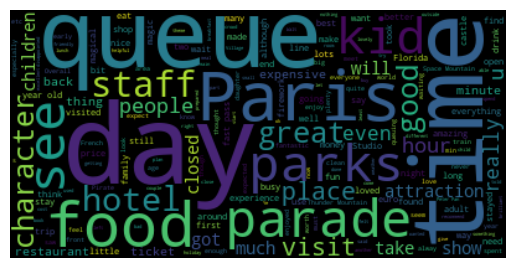

In [71]:
txt = ' '.join(disney_paris["Review_Text"].fillna(''))

filter_out = set(STOPWORDS)
filter_out.update(['park','ride','rides','went','lot','Disneyland','go','one','Disney'])

wordcloud = WordCloud(stopwords=filter_out).generate(txt)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

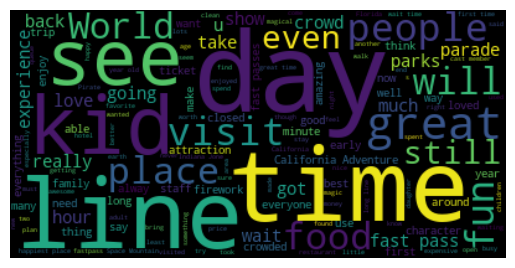

In [72]:
txt = ' '.join(disney_ca["Review_Text"].fillna(''))

filter_out = set(STOPWORDS)
filter_out.update(['park','ride','rides','went','lot','Disneyland','go','one','Disney'])

wordcloud = WordCloud(stopwords=filter_out).generate(txt)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [73]:
disney_time_reviews = disney_orig[disney_orig["Review_Text"].str.contains("time", regex = True)]
disney_time_reviews

,Rating,Year_Month,Reviewer_Location,Review_Text,Branch,Sentiment,Polarity,Positive_Polarity,Neutral_Polarity,Compound_Polarity
Review_ID,,,,,,,,,,
670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong,1,"{'neg': 0.04, 'neu': 0.73, 'pos': 0.231, 'comp...",0.231,0.730,0.9901
670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong,1,"{'neg': 0.024, 'neu': 0.742, 'pos': 0.235, 'co...",0.235,0.742,0.9920
670570869,5,2019-3,India,I can go on talking about Disneyland. Whatever...,Disneyland_HongKong,1,"{'neg': 0.028, 'neu': 0.8, 'pos': 0.172, 'comp...",0.172,0.800,0.9645
670435886,5,2019-4,Canada,We spent the day here with our grown kids and ...,Disneyland_HongKong,1,"{'neg': 0.066, 'neu': 0.776, 'pos': 0.158, 'co...",0.158,0.776,0.8789
670129921,3,2019-4,United Kingdom,Around 60 per person and if you want to eat ...,Disneyland_HongKong,1,"{'neg': 0.0, 'neu': 0.899, 'pos': 0.101, 'comp...",0.101,0.899,0.6757
...,...,...,...,...,...,...,...,...,...,...
2320647,4,missing,United Kingdom,I'm an avid Disney fan having been to Disney L...,Disneyland_Paris,1,"{'neg': 0.035, 'neu': 0.79, 'pos': 0.175, 'com...",0.175,0.790,0.9981
2228738,3,missing,Spain,It's my 4th. visit to disneyland paris and all...,Disneyland_Paris,1,"{'neg': 0.05, 'neu': 0.888, 'pos': 0.062, 'com...",0.062,0.888,-0.0689
2192691,5,missing,United States,I've been to Disney in California 5 times. I'v...,Disneyland_Paris,1,"{'neg': 0.0, 'neu': 0.883, 'pos': 0.117, 'comp...",0.117,0.883,0.9476


In [81]:
disney_rating_one = disney_orig[disney_orig["Rating"]==1]
disney_rating_one["Compound_Polarity"].quantile([0.25,0.5,0.75])

0.25   -0.8153
0.50   -0.2315
0.75    0.7135
Name: Compound_Polarity, dtype: float64

In [80]:
disney_rating_one["Compound_Polarity"].max()

0.9989

In [82]:
disney_rating_two = disney_orig[disney_orig["Rating"]==2]
disney_rating_two["Compound_Polarity"].quantile([0.25,0.5,0.75])

0.25   -0.58445
0.50    0.38070
0.75    0.87200
Name: Compound_Polarity, dtype: float64

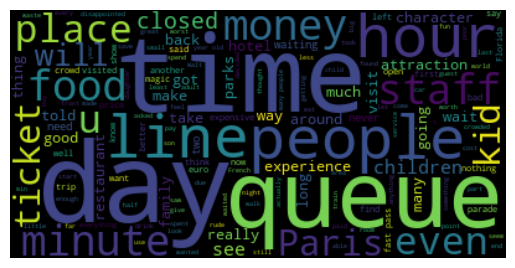

In [84]:
txt = ' '.join(disney_rating_one["Review_Text"].fillna(''))

filter_out = set(STOPWORDS)
filter_out.update(['park','ride','rides','went','lot','Disneyland','go','one','Disney'])

wordcloud = WordCloud(stopwords=filter_out).generate(txt)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

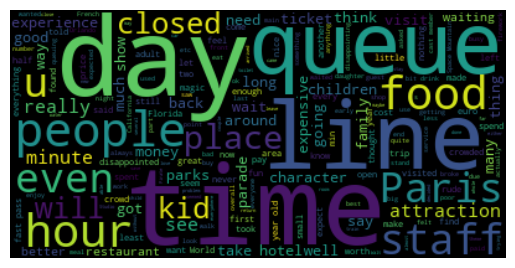

In [85]:
txt = ' '.join(disney_rating_two["Review_Text"].fillna(''))

filter_out = set(STOPWORDS)
filter_out.update(['park','ride','rides','went','lot','Disneyland','go','one','Disney'])

wordcloud = WordCloud(stopwords=filter_out).generate(txt)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

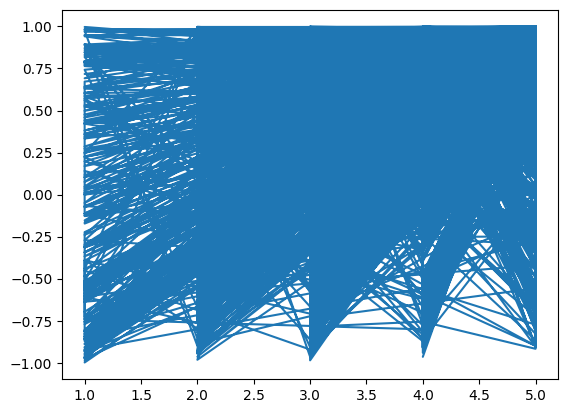

In [86]:
plt.plot(disney_hk["Rating"],disney_hk["Compound_Polarity"])

<BarContainer object of 9620 artists>

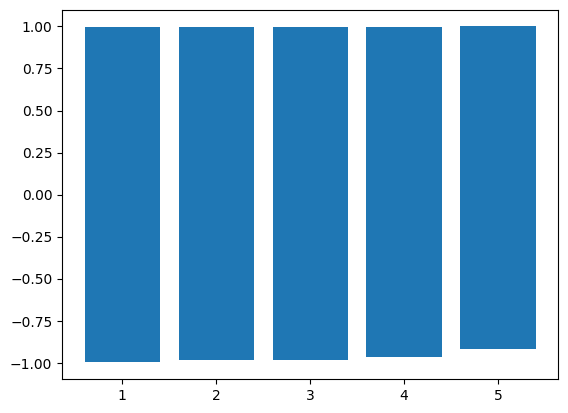

In [87]:
plt.bar(disney_hk["Rating"],height = disney_hk["Compound_Polarity"])

<BarContainer object of 42656 artists>

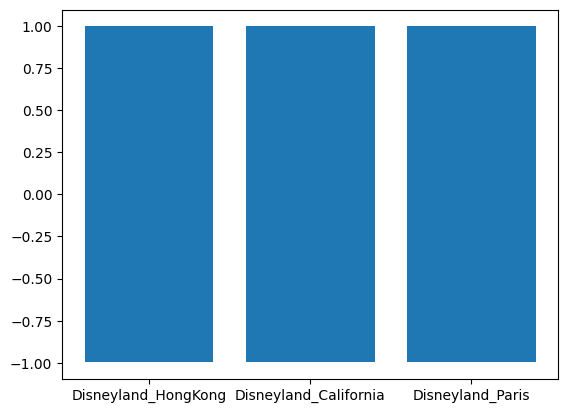

In [88]:
plt.bar(disney_orig["Branch"],height = disney_orig["Compound_Polarity"])

{'whiskers': [<matplotlib.lines.Line2D at 0x186045a90>,
 'caps': [<matplotlib.lines.Line2D at 0x186046bd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1860451d0>],
 'medians': [<matplotlib.lines.Line2D at 0x186047c90>],
 'fliers': [<matplotlib.lines.Line2D at 0x18600f3d0>],
 'means': []}

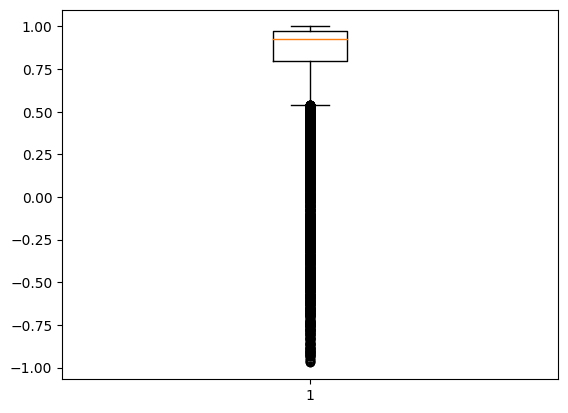

In [97]:
disney_rating_five = disney_orig[disney_orig["Rating"]==5]
plt.boxplot(disney_rating_five["Compound_Polarity"])

{'whiskers': [<matplotlib.lines.Line2D at 0x185f00e10>,
 'caps': [<matplotlib.lines.Line2D at 0x185f02150>,
 'boxes': [<matplotlib.lines.Line2D at 0x185eb8c50>],
 'medians': [<matplotlib.lines.Line2D at 0x185f03250>],
 'fliers': [<matplotlib.lines.Line2D at 0x185f02110>],
 'means': []}

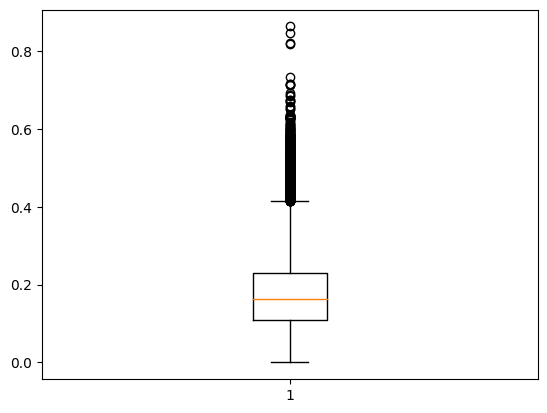

In [92]:
plt.boxplot(disney_orig["Positive_Polarity"])

In [94]:
disney_orig["Positive_Polarity"].quantile([0.25,0.5,0.75])

0.25    0.108
0.50    0.162
0.75    0.231
Name: Positive_Polarity, dtype: float64